In [12]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt  
okt = Okt() 
import tensorflow as tf
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [14]:
emotion = pd.read_csv('emotion_dataset.csv')
emotion.head(1)

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포


In [15]:
emotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38594 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  38594 non-null  object
 1   Emotion   38594 non-null  object
dtypes: object(2)
memory usage: 603.2+ KB


## 전처리

In [16]:
emotion 

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오
38590,재미가 없으니 망하지,혐오
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오


In [17]:
emotion['Sentence'] = emotion['Sentence'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
emotion[:5]

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요,공포
1,그냥 내 느낌일뿐겠지,공포
2,아직너무초기라서 그런거죠,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포


In [18]:
emotion['Sentence'] = emotion['Sentence'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
emotion['Sentence'].replace('', np.nan, inplace=True)
print(emotion.isnull().sum())

Sentence    2
Emotion     0
dtype: int64


In [19]:
emotion[emotion['Sentence'].isnull()]

,Sentence,Emotion
10149,NaN,놀람
31822,NaN,행복


In [20]:
emotion = emotion.dropna(how = 'any')
print('전처리 후 데이터의 개수 :',len(emotion))

전처리 후 데이터의 개수 : 38592


## 데이터 라벨링

In [21]:
emotion.loc[(emotion['Emotion'] == "공포"), 'Emotion'] = 0  #공포 => 0
emotion.loc[(emotion['Emotion'] == "놀람"), 'Emotion'] = 1  #놀람 => 1
emotion.loc[(emotion['Emotion'] == "분노"), 'Emotion'] = 2  #분노 => 2
emotion.loc[(emotion['Emotion'] == "슬픔"), 'Emotion'] = 3  #슬픔 => 3
emotion.loc[(emotion['Emotion'] == "중립"), 'Emotion'] = 4  #중립 => 4
emotion.loc[(emotion['Emotion'] == "행복"), 'Emotion'] = 5  #행복 => 5
emotion.loc[(emotion['Emotion'] == "혐오"), 'Emotion'] = 6  #혐오 => 6

## 데이터 형변환 object -> int

In [22]:
## 시도 1 astype()으로 변경

In [23]:
emotion.Emotion = emotion.Emotion.astype(int)

In [24]:
emotion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38592 entries, 0 to 38593
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  38592 non-null  object
 1   Emotion   38592 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 753.8+ KB


In [25]:
emotion.Emotion.unique()

array([0, 1, 2, 3, 4, 5, 6])

---

In [26]:
## 시도 2 하나씩 분리해서 다시 append

In [27]:
fear = emotion[emotion['Emotion'] == 0]
fear['Emotion'] = 0

In [28]:
sur = emotion[emotion['Emotion'] == 1]
sur['Emotion'] = 1

In [29]:
ang = emotion[emotion['Emotion'] == 2]
ang['Emotion'] = 2
sad = emotion[emotion['Emotion'] == 3]
sad['Emotion'] = 3
neu = emotion[emotion['Emotion'] == 4]
neu['Emotion'] = 4
joy = emotion[emotion['Emotion'] == 5]
joy['Emotion'] = 5
hat = emotion[emotion['Emotion'] == 6]
hat['Emotion'] = 6

In [30]:
emotion = fear.append(sur)

In [31]:
emotion = emotion.append(ang)
emotion = emotion.append(sad)
emotion = emotion.append(neu)
emotion = emotion.append(joy)
emotion = emotion.append(hat)

---

In [32]:
emotion.shape

(38592, 2)

In [33]:
# print(data_list[0])
# print(data_list[6000])
# print(data_list[12000])
# print(data_list[18000])
# print(data_list[24000])
# print(data_list[30000])
# print(data_list[-1])

In [34]:
emotion.reset_index(drop=True,inplace=True)

In [35]:
type(emotion['Emotion'].iloc[0])

numpy.int64

## 데이터 분리

In [36]:
train_data, test_data = train_test_split(
  emotion,
  test_size = 0.25,
  random_state = 5
)

In [37]:
train_data.head(3)

,Sentence,Emotion
8793,진짜 많은 사람들앞에서 실제로 손님이 있다고치고 연습하나요,1
5134,남자친구한테 기대지않으려면 어떻게해야할까요,0
1440,유투브 땅굴 발견 전쟁임박,0


In [38]:
 # 불용어 (가사 빈도수 높은 + 감정분류와 무관한 단어 추가 중)
stop_w = ['all','이렇게','네가','있는','니가','없는','너의','너무','그런',
          'oh','whoo','tuesday','내가','너를','나를','we','this','the','그렇게',
          'so','am','baby','and','can','you','much','me','for','go','in',
          '은', '는', '이', '가', '하','부터','처럼','까지',
          'know','no','of','let','my','수','너','내','나','그','난','봐',
          '돼','건','모든','에서','에게','싶어','잖아',
          '날','널','수','것','못','말','넌','젠','하나','정말','알','여기',
          '우리','다시','하게','니까',
          '때','아','더','게','또','채','일','걸','누구','나는','너는','라면',
          '같아','있어',
          '의','가','보','들','좀','잘','걍','과','도','를','으로','우린','하지',
          '해도','하고','없어','않아',
          '자','에','와','한','하다','네','있다','나의','해','다','내게','왜',
          '거야','이제','그냥','했던','하는']

In [39]:
# 학습 데이터
X_train = []
for sentence in tqdm(train_data['Sentence']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stop_w] # 불용어 제거
    X_train.append(stopwords_removed_sentence)

100%|███████████████████████████████████████████████████████████████████████████| 28944/28944 [02:14<00:00, 215.65it/s]


In [40]:
# 테스트 데이터 
X_test = []
for sentence in tqdm(test_data['Sentence']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stop_w] # 불용어 제거
    X_test.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 9648/9648 [00:40<00:00, 237.15it/s]


In [41]:
X_train[:1]

[['진짜', '많다', '사람', '앞', '실제', '로', '손님', '연습', '하나요']]

## 정답 데이터 저장

In [42]:
y_train = np.array(train_data['Emotion'])
y_test = np.array(test_data['Emotion'])

In [43]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop_test = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]
print(drop_train)

[6145, 6853, 7993, 8338, 9141, 17672, 18777, 20080, 20274, 28235]


In [44]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
X_test = np.delete(X_test, drop_test, axis=0)
y_test = np.delete(y_test, drop_test, axis=0)
print(len(X_test))
print(len(y_test))

28934
28934
9648
9648
9640
9640


## 정수 인코딩

In [45]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [46]:
# print(tokenizer.word_index)
# print(tokenizer.word_counts.items())

In [47]:
print(X_train[:1])

[list(['진짜', '많다', '사람', '앞', '실제', '로', '손님', '연습', '하나요'])]


## 빈도수 확인

In [48]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [49]:
# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 19774
등장 빈도가 2번 이하인 희귀 단어의 수: 12449
단어 집합에서 희귀 단어의 비율: 62.95640740366137
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.144362146026966


In [50]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7326


In [51]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

### 정수 인코딩 확인

In [52]:
print(X_train[:1])

[[9, 33, 14, 131, 982, 10, 1129, 1552, 747]]


## 패딩

문장의 최대 길이 : 112
문장의 평균 길이 : 5.9876961360337315


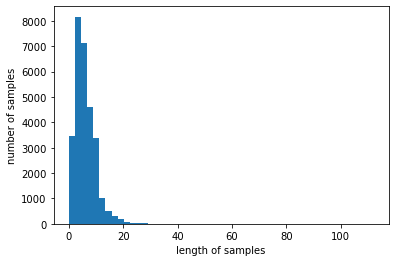

In [53]:
print('문장의 최대 길이 :',max(len(l) for l in X_train))
print('문장의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [54]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [55]:
max_len = 20
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 20 이하인 샘플의 비율: 99.50577175641115


## 모든 샘플의 길이를 max_len로 조정

In [56]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [57]:
X_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  729,  164,   16, 2125,  269,  126])

## 모델 적용

In [58]:
import numpy as np

In [59]:

import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, LSTM, Embedding, Bidirectional,TimeDistributed
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [60]:
# 결과값 seq to seq : many to many

In [61]:
# model = Sequential()
# model.add(Embedding(vocab_size, 300, mask_zero=True))
# model.add(Bidirectional(LSTM(128)))
# model.add(Dense(64,activation="relu"))
# model.add(Dense(32,activation="relu"))
# model.add(Dense(16,activation="relu"))
# model.add(Dense(7,activation='sigmoid')) # , activation='sigmoid'

## 적용 
다중 분류 모델이므로
* `softmax`
* 7가지 감정
* loss는 `binary_crossentropy`가 아닌  `sparse_categorical_crossentropy`로 compile

### softmax , 7 , sparse_categorical_crossentropy

In [62]:
model = Sequential()
model.add(Embedding(vocab_size, 300, mask_zero=True))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(7,activation='softmax')) # , activation='sigmoid'

In [63]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
362/362 [==============================] - 118s 228ms/step - loss: 1.6103 - acc: 0.3613 - val_loss: 1.4482 - val_acc: 0.4424

Epoch 00001: val_acc improved from -inf to 0.44237, saving model to best_model.h5
Epoch 2/15
362/362 [==============================] - 63s 173ms/step - loss: 1.2291 - acc: 0.5354 - val_loss: 1.4500 - val_acc: 0.4460

Epoch 00002: val_acc improved from 0.44237 to 0.44600, saving model to best_model.h5
Epoch 3/15
362/362 [==============================] - 65s 180ms/step - loss: 0.9901 - acc: 0.6399 - val_loss: 1.6337 - val_acc: 0.4381

Epoch 00003: val_acc did not improve from 0.44600
Epoch 4/15
362/362 [==============================] - 66s 181ms/step - loss: 0.7663 - acc: 0.7219 - val_loss: 1.8394 - val_acc: 0.4126

Epoch 00004: val_acc did not improve from 0.44600
Epoch 5/15
362/362 [==============================] - 64s 176ms/step - loss: 0.5860 - acc: 0.7881 - val_loss: 2.3486 - val_acc: 0.4050

Epoch 00005: val_acc did not improve from 0.44600
Ep

In [65]:
model.save('./models/multi_emotion.h5')

In [67]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

302/302 [==============================] - 7s 22ms/step - loss: 2.2491 - acc: 0.4095

 테스트 정확도: 0.4095


In [ ]:
# loaded_model =  keras.models.load_model('./models/multi_emotion.h5')
# print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

---

## 다중 분류 예측 함수 과정

In [55]:
new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', '진짜 많은 사람들앞에서 실제로 손님이 있다고치고 연습하나요')
new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
new_sentence = [word for word in new_sentence if not word in stop_w] # 불용어 제거
encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
score = model.predict(pad_new) # 예측

In [56]:
print(score)

[[3.0556500e-02 9.6903306e-01 9.0896632e-05 2.1392432e-05 2.7169505e-04
  1.5431358e-07 2.6324507e-05]]


In [71]:
def multi_sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stop_w] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = model.predict(pad_new) # 예측
    if score[0][0] == score[0].max():
        print(f"{round(score[0][0] * 100,2)} 확률로 공포 문장입니다.\n")
    elif score[0][1] == score[0].max():
        print(f"{round(score[0][1] * 100,2)} 확률로 놀람 문장입니다.\n")
    elif score[0][2] == score[0].max():
        print(f"{round(score[0][2] * 100,2)} 확률로 분노 문장입니다.\n")
    elif score[0][3] == score[0].max():
        print(f"{round(score[0][3] * 100,2)} 확률로 슬픔 문장입니다.\n")
    elif score[0][4] == score[0].max():
        print(f"{round(score[0][4] * 100,2)} 확률로 중립 문장입니다.\n")
    elif score[0][5] == score[0].max():
        print(f"{round(score[0][5] * 100,2)} 확률로 행복 문장입니다.\n")
    elif score[0][6] == score[0].max():
        print(f"{round(score[0][6] * 100,2)} 확률로 혐오 문장입니다.\n")

In [59]:
multi_sentiment_predict('유치원버스 사고 낫다던데')

99.71 확률로 놀람 문장입니다.



In [60]:
multi_sentiment_predict('유투브 땅굴 발견 전쟁임박')

99.99 확률로 공포 문장입니다.



In [61]:
multi_sentiment_predict('근데 원래이런거맞나요')

47.35 확률로 놀람 문장입니다.



In [62]:
multi_sentiment_predict('적막한 밤하늘 내 맘에도 드리우면 난 늘 그대가 보고 싶곤 해')

98.45 확률로 행복 문장입니다.



In [63]:
multi_sentiment_predict('너의 웃음소리 참 듣기가 좋아')

99.77 확률로 행복 문장입니다.



In [64]:
multi_sentiment_predict('그대와 나 이별하던 그날 그 아침 나는 울지 않았소')

55.72 확률로 슬픔 문장입니다.



In [65]:
multi_sentiment_predict('나 그댈 위해 시 한 편을 쓰겠어')

74.45 확률로 중립 문장입니다.



In [66]:
multi_sentiment_predict('두 눈에 비친 너의 미소 지친 날 감싸듯')

83.63 확률로 슬픔 문장입니다.



In [67]:
multi_sentiment_predict('창가에 요란히 내리는 빗물 소리만큼')

52.34 확률로 놀람 문장입니다.



In [68]:
multi_sentiment_predict('창가에 요란히 내리는 빗물 소리만큼 시린 기억들')

64.83 확률로 놀람 문장입니다.



In [68]:
playlist = pd.read_csv('pre_total_playlist.csv')

In [69]:
playlist.Lyric[0]

'아무리 기다려도 난 못가   바보처럼 울고 있는 너의 곁에  상처만 주는 나를 왜 모르고   기다리니 떠나가란 말야    보고 싶다 보고 싶다   이런 내가 미워질만큼  울고 싶다 네게 무릎 꿇고   모두 없던 일이 될 수 있다면    미칠듯 사랑했던 기억이   추억들이 너를 찾고 있지만  더 이상 사랑이란 변명에   너를 가둘 수 없어    이러면 안되지만   죽을만큼 보고 싶다    보고 싶다 보고 싶다   이런 내가 미워질만큼  믿고 싶다 옳은 길이라고   너를 위해 떠나야만 한다고    미칠듯 사랑했던 기억이   추억들이 너를 찾고 있지만  더 이상 사랑이란 변명에   너를 가둘수 없어    이러면 안되지만   죽을만큼 보고 싶다    죽을 만큼 잊고 싶다  '

In [72]:
multi_sentiment_predict(playlist.Lyric[0])

98.83 확률로 슬픔 문장입니다.



In [ ]:
# loaded_model = load_model('GRU_model.h5')
# print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

# 예측 결과 DataFrame

In [73]:
def multi_sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stop_w] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = model.predict(pad_new) # 예측
    if score[0][0] == score[0].max():
        y = round(score[0][0] * 100,2) 
        e = '공포'
    elif score[0][1] == score[0].max():
        y = round(score[0][1] * 100,2)
        e = '놀람'
    elif score[0][2] == score[0].max():
        y = round(score[0][2] * 100,2)
        e = '분노'
    elif score[0][3] == score[0].max():
        y = round(score[0][3] * 100,2)
        e = '슬픔' 
    elif score[0][4] == score[0].max():
        y = round(score[0][4] * 100,2)
        e = '중립'
    elif score[0][5] == score[0].max():
        y = round(score[0][5] * 100,2)
        e = '행복'
    elif score[0][6] == score[0].max():
        y = round(score[0][6] * 100,2)
        e = '혐오'
    return [y,e]

In [140]:
result = []
for i in range(len(playlist)):    
    emotion_list = {
    'emotion' : multi_sentiment_predict(playlist.Lyric[i])[1],
    'percentage': multi_sentiment_predict(playlist.Lyric[i])[0]        
    }

    df = pd.DataFrame.from_dict(emotion_list, orient='index')
    df = df.transpose()
    result.append(df)

In [143]:
emotion_df = pd.concat(result).reset_index(drop=True)    
emotion_df

,emotion,percentage
0,슬픔,99.98
1,혐오,93.41
2,슬픔,99.92
3,혐오,99.89
4,공포,64.91
...,...,...
15337,슬픔,84.84
15338,혐오,90.31
15339,분노,84.99
15340,행복,54.35


In [144]:
meta_emotion_df = emotion_df.join(playlist,lsuffix='index')
meta_emotion_df.head()


,emotion,percentage,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,words
0,슬픔,99.98,418253,보고 싶다,김범수,3rd. 보고 싶다,342238,아무리 기다려도 난 못가 바보처럼 울고 있는 너의 곁에 상처만 주는 나를 왜 ...,https://image.bugsm.co.kr/album/images/200/262...,"['국내', '가요', '발라드한', '발라드', '국내 발라드', '가을', '쓸...","['아무리', '기다려도', '난', '못가', '바보처럼', '울고', '있는',..."
1,혐오,93.41,445413,사랑합니다...,팀,Tim 영민,332810,나빠요 참 그대란 사람 허락도 없이 왜 내 맘 가져요 그대 때문에 난 힘겹게 살고만...,https://image.bugsm.co.kr/album/images/200/307...,"['국내', '발라드', '발라드한', '100시리즈', '가을', '가요', '감...","['나빠요', '참', '그대란', '사람', '허락도', '없이', '왜', '내..."
2,슬픔,99.92,489056,어쩌면...,버즈,Morning Of Buzz,295142,어쩌면 오늘이 마지막이 될지도 몰라 나의 사랑이 떠날지 몰라 불안한 나의 마음 니가...,https://image.bugsm.co.kr/album/images/200/328...,"['국내', '락발라드', '발라드한', '2000년대', '세부장르', '100시...","['어쩌면', '오늘이', '마지막이', '될지도', '몰라', '나의', '사랑이..."
3,혐오,99.89,460396,소주 한 잔,임창정,Bye,277349,술이 한 잔 생각나는 밤 같이 있는 것 같아요 그 좋았던 시절들 이젠 모두 한숨만...,https://image.bugsm.co.kr/album/images/200/314...,"['국내', '발라드한', '발라드', '국내 발라드', '100시리즈', '가요'...","['술이', '한', '잔', '생각나는', '밤', '같이', '있는', '것',..."
4,공포,64.91,482653,With Me,휘성(Realslow),It's Real,268787,네 손짓 하나 보는 게 난 좋은데 네 목소리를 듣는 것도 좋은데 왜 넌 내 ...,https://image.bugsm.co.kr/album/images/200/325...,"['가요', '섹시한', '남성보컬']","['네', '손짓', '하나', '보는', '게', '난', '좋은데', '네', ..."


In [145]:
meta_emotion_df.to_csv('meta_emotion.csv',index=False)

---

## 최신노래 (2020~2021) 감정 분류

In [146]:
latest = pd.read_csv('latest_meta.csv')

In [148]:
result = []
for i in range(len(latest)):    
    emotion_list = {
    'emotion' : multi_sentiment_predict(latest.Lyric[i])[1],
    'percentage': multi_sentiment_predict(latest.Lyric[i])[0]        
    }

    df = pd.DataFrame.from_dict(emotion_list, orient='index')
    df = df.transpose()
    result.append(df)

In [151]:
emotion_df = pd.concat(result).reset_index(drop=True)    
emotion_df

,emotion,percentage
0,혐오,98.68
1,행복,80.31
2,슬픔,84.45
3,놀람,99.14
4,슬픔,52.23
...,...,...
1249,슬픔,78.24
1250,슬픔,99.61
1251,슬픔,80.24
1252,혐오,92.49


In [152]:
meta_emotion_df = emotion_df.join(latest,lsuffix='index')
meta_emotion_df.head()


,emotion,percentage,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
0,혐오,98.68,1764294,Monster (Korean ver.),드렁큰 타이거(Drunken Tiger),Feel gHood Muzik - The 8th Wonder,67572,아픈 마음의 상처에 음악의 연고를 발라버려 밤 밤 바바바 밤발라버려 밤 밤...,https://image.bugsm.co.kr/album/images/200/189...,"['2020년', '2020년대', '연도별 국내영화OST', '영화', 'OST'...",2020y
1,행복,80.31,30598121,밤편지,아이유(IU),밤편지,38694,이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요 음 사랑한다는 말 이에요 ...,https://image.bugsm.co.kr/album/images/200/200...,"['국내외', '2020년', '100시리즈', '뮤직기네스', '2020 벅스 종...",2020y
2,슬픔,84.45,517714,I Believe (엽기적인 그녀 O.S.T),신승훈,The Shin Seung Hun,34174,그댄 곁에 없지만 이대로 이별은 아니겠죠 나에게 오는 길은 조금 멀리...,https://image.bugsm.co.kr/album/images/200/158...,"['2020년', '2020년대', '연도별 국내영화OST', '영화', 'OST'...",2020y
3,놀람,99.14,30994623,"모든 날, 모든 순간 (Every day, Every Moment)",폴킴(Paul Kim),'키스 먼저 할까요?' OST Part.3,26963,네가 없이 웃을 수 있을까 생각만 해도 눈물이나 힘든 시간 날 지켜준 사람 이...,https://image.bugsm.co.kr/album/images/200/201...,"['국내외', '2020년', '100시리즈', '뮤직기네스', '2020 벅스 종...",2020y
4,슬픔,52.23,31548668,작은 것들을 위한 시 (Boy With Luv) (Feat. Halsey),방탄소년단,MAP OF THE SOUL : PERSONA,19884,모든 게 궁금해 뭐가 널 행복하게 하는지 내 머리맡에...,https://image.bugsm.co.kr/album/images/200/202...,"['국내외', '2020년', '100시리즈', '뮤직기네스', '2020 벅스 종...",2020y


In [153]:
meta_emotion_df.to_csv('meta_emotion_latest.csv',index=False)

---

## 연대별 감성 분류
* 1940 ~ 2010 년대 + 2020 + 2021

In [74]:
sort_total_years = pd.read_csv('sort_total_years.csv')

In [75]:
result = []
for i in range(len(sort_total_years)):    
    emotion_list = {
    'emotion' : multi_sentiment_predict(sort_total_years.Lyric[i])[1],
    'percentage': multi_sentiment_predict(sort_total_years.Lyric[i])[0]        
    }

    df = pd.DataFrame.from_dict(emotion_list, orient='index')
    df = df.transpose()
    result.append(df)

In [76]:
emotion_df = pd.concat(result).reset_index(drop=True)    
emotion_df

,emotion,percentage
0,행복,81.6
1,혐오,99.61
2,혐오,60.23
3,행복,57.15
4,행복,70.41
...,...,...
4557,중립,48.81
4558,행복,99.83
4559,혐오,75.15
4560,혐오,58.63


In [77]:
meta_emotion_df = emotion_df.join(sort_total_years,lsuffix='index')
meta_emotion_df.head()


,emotion,percentage,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
0,행복,81.6,191162,오빠는 풍각(風角)쟁이,박향림,유성기로 듣던 불멸의 명가수 - 박향림 편,1914,오빠는 풍각쟁이야 머 오빠는 심술쟁이야 머 난몰라 난몰라 내반찬 다 뺏어 먹는거...,https://image.bugsm.co.kr/album/images/200/101...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
1,혐오,99.61,80078168,애수의 소야곡,남인수,남인수 골든,937,운다고 옛사랑이 오리요만은 눈물로 달래보는 구슬픈 이밤 고요히 창을 열고 별빛...,https://image.bugsm.co.kr/album/images/200/800...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
2,혐오,60.23,111683,불효자는 웁니다,진방남,"유성기로 듣던 불멸의 명가수 - 진방남, 고운봉, 송달협 편",732,울며헤진 부산항을 돌아다보니 연락선 난간머리 흘러온달빛 이별만은 어렵더라 이별만...,https://image.bugsm.co.kr/album/images/200/101...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
3,행복,57.15,173791,눈물젖은 두만강(豆滿江),김정구,유성기로 듣던 불멸의 명가수 - 김정구 편,609,두만강 푸른 물에 노젓는 뱃사공 흘러간 그 옛날에 내 님을 싣고 ...,https://image.bugsm.co.kr/album/images/200/101...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
4,행복,70.41,173084,번지없는 주막,백년설,유성기로 듣던 불멸의 명가수 - 백년설 편,511,불러봐도 울어봐도 못 오실 어머님을 원통해 불러보고 땅을 치며 통곡해요 다시 ...,https://image.bugsm.co.kr/album/images/200/100...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y


In [78]:
meta_emotion_df.to_csv('meta_emotion_years.csv',index=False)